In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation




In [2]:
df_num = pd.read_csv('data/train_cleaned_num.csv')

df_num

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,7,2003,2003,856,1710,2,0,548,208500
1,6,1976,1976,1262,1262,2,1,460,181500
2,7,2001,2002,920,1786,2,1,608,223500
3,7,1915,1970,756,1717,1,1,642,140000
4,8,2000,2000,1145,2198,2,1,836,250000
...,...,...,...,...,...,...,...,...,...
1454,6,1999,2000,953,1647,2,1,460,175000
1455,6,1978,1988,1542,2073,2,2,500,210000
1456,7,1941,2006,1152,2340,2,2,252,266500
1457,5,1950,1996,1078,1078,1,0,240,142125


In [3]:
df_whole_analysis = pd.read_csv('data/train_cleaned_analyse.csv')

df_whole_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1458 non-null   float64
 1   YearBuilt              1458 non-null   float64
 2   YearRemodAdd           1458 non-null   float64
 3   TotalBsmtSF            1458 non-null   float64
 4   GrLivArea              1458 non-null   float64
 5   FullBath               1458 non-null   float64
 6   Fireplaces             1458 non-null   float64
 7   GarageArea             1458 non-null   float64
 8   SalePrice              1458 non-null   float64
 9   Condition1_Feedr       1458 non-null   float64
 10  Condition1_Norm        1458 non-null   float64
 11  Condition1_PosA        1458 non-null   float64
 12  Condition1_PosN        1458 non-null   float64
 13  Condition1_RRAe        1458 non-null   float64
 14  Condition1_RRAn        1458 non-null   float64
 15  Cond

In [4]:
df_whole_analysis_dummy = pd.read_csv('data/train_cleaned_dummy_analyse.csv')

df_whole_analysis_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   OverallQual            1459 non-null   int64
 1   YearBuilt              1459 non-null   int64
 2   YearRemodAdd           1459 non-null   int64
 3   TotalBsmtSF            1459 non-null   int64
 4   GrLivArea              1459 non-null   int64
 5   FullBath               1459 non-null   int64
 6   Fireplaces             1459 non-null   int64
 7   GarageArea             1459 non-null   int64
 8   SalePrice              1459 non-null   int64
 9   HouseStyle_1.5Unf      1459 non-null   bool 
 10  HouseStyle_1Story      1459 non-null   bool 
 11  HouseStyle_2.5Fin      1459 non-null   bool 
 12  HouseStyle_2.5Unf      1459 non-null   bool 
 13  HouseStyle_2Story      1459 non-null   bool 
 14  HouseStyle_SFoyer      1459 non-null   bool 
 15  HouseStyle_SLvl        1459 non-null  

In [5]:
df_whole_fanova = pd.read_csv('data/train_cleaned_anova.csv')

In [6]:
#1 Erstes Beispiel einer Lineare Regression mit Korrelationsmatrix Features Selection.

# Daten aufteilen

X = df_num.drop(['SalePrice'], axis=1)

y = df_num['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Merkmale skalieren (WICHTIG!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model_lr = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr.fit(X_train, y_train)

print("Lineare Regression trainiert.")
print(f"Achsenabschnitt (c): {model_lr.intercept_:.2f}")
print(f"Steigung (m): {model_lr.coef_[0]:.2f}")

Lineare Regression trainiert.
Achsenabschnitt (c): -1256918.86
Steigung (m): 20024.03


In [9]:
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nMean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")



Mean Squared Error (MSE): 1039977460.98
R-squared (R²): 0.84


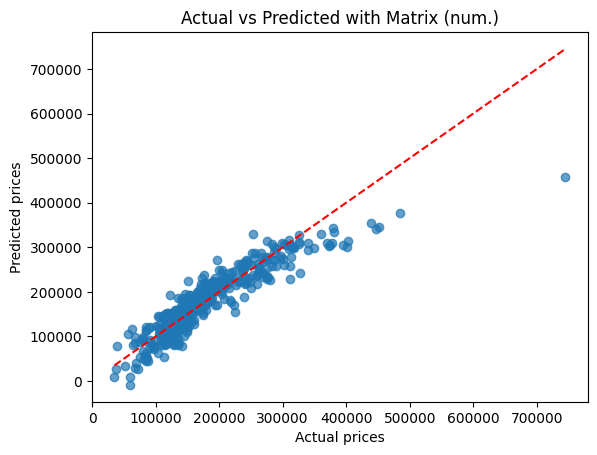

In [10]:
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [11]:
#2A Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit Hintergrundkenntnisse und Analyse).

X_c = df_whole_analysis.drop(['SalePrice'], axis=1)

y_c = df_whole_analysis['SalePrice']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

numeric_features_c = X_c.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features_c)],
    remainder='passthrough')

X_train_scaled_c = preprocessor.fit_transform(X_train_c)
X_test_scaled_c = preprocessor.transform(X_test_c)

model_lr_c = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_c.fit(X_train_scaled_c, y_train_c)

print("Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.")
print(f"Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_c.intercept_:.2f}")
print(f"Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_c.coef_[0]:.2f}")

y_pred_lr_c = model_lr_c.predict(X_test_scaled_c)

mse_lr_c = mean_squared_error(y_test_c, y_pred_lr_c)
r2_lr_c = r2_score(y_test_c, y_pred_lr_c)

print(f"\nMean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): {mse_lr_c:.2f}")
print(f"R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): {r2_lr_c:.2f}")


Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.
Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): 180639.70
Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): 20171.14

Mean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): 1058438849.87
R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): 0.84


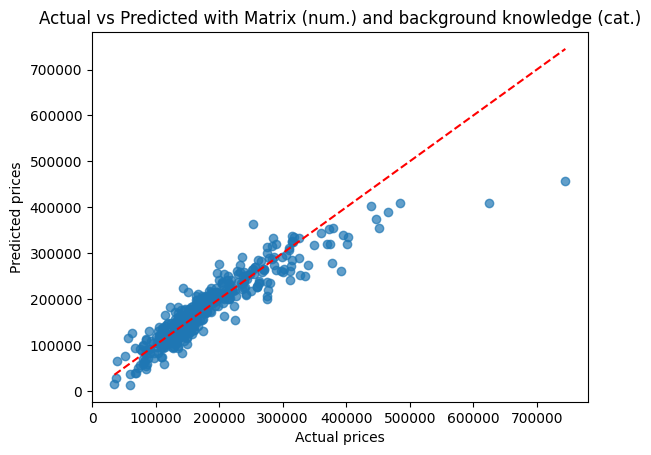

In [12]:
plt.scatter(y_test_c, y_pred_lr_c, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.) and background knowledge (cat.)")
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'r--') 
plt.show()

In [13]:
#2B Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit Hintergrundkenntnisse und Analyse- dummy).

X_d = df_whole_analysis_dummy.drop(['SalePrice'], axis=1)

y_d = df_whole_analysis_dummy['SalePrice']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state=42)

numeric_features_d = X_d.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor_d = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features_d)],
    remainder='passthrough')

X_train_scaled_d = preprocessor_d.fit_transform(X_train_d)
X_test_scaled_d = preprocessor_d.transform(X_test_d)

model_lr_d = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_d.fit(X_train_scaled_d, y_train_d)

print("Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.")
print(f"Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_d.intercept_:.2f}")
print(f"Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_d.coef_[0]:.2f}")

y_pred_lr_d = model_lr_d.predict(X_test_scaled_d)

mse_lr_d = mean_squared_error(y_test_d, y_pred_lr_d)
r2_lr_d = r2_score(y_test_d, y_pred_lr_d)

print(f"\nMean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): {mse_lr_d:.2f}")
print(f"R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): {r2_lr_d:.2f}")

Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.
Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): 117367.32
Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): 20752.42

Mean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): 952953511.19
R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): 0.85


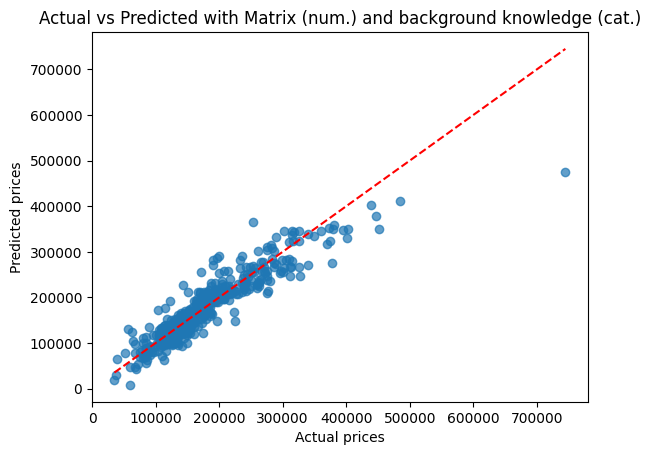

In [14]:
plt.scatter(y_test_d, y_pred_lr_d, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.) and background knowledge (cat.)")
plt.plot([y_test_d.min(), y_test_d.max()], [y_test_d.min(), y_test_d.max()], 'r--') 
plt.show()

In [15]:
#2C Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit Hintergrundkenntnisse und Analyse- 
# dummy und Skalierung, die die Unterschiede zwischen den kategorische Varibel train/ test ignoriert).

X_f = df_whole_analysis_dummy.drop(['SalePrice'], axis=1)

y_f = df_whole_analysis_dummy['SalePrice']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=42)

numeric_features_f = X_f.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features_f = X_f.select_dtypes(include=["object", "category"]).columns.tolist()

# Baue neuen Preprocessor
preprocessor_f = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features_f),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_f)
])

X_train_scaled_f = preprocessor_f.fit_transform(X_train_f)
X_test_scaled_f = preprocessor_f.transform(X_test_f)

model_lr_f = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_f.fit(X_train_scaled_f, y_train_f)

print("Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.")
print(f"Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_f.intercept_:.2f}")
print(f"Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_f.coef_[0]:.2f}")

y_pred_lr_f = model_lr_f.predict(X_test_scaled_f)

mse_lr_f = mean_squared_error(y_test_f, y_pred_lr_f)
r2_lr_f = r2_score(y_test_f, y_pred_lr_f)

print(f"\nMean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): {mse_lr_f:.2f}")
print(f"R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): {r2_lr_f:.2f}")


Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.
Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): 181126.18
Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): 27290.37

Mean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): 1039977460.98
R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): 0.84


In [16]:
#3 Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit F-Anova).
X_Anova = df_whole_fanova.drop(['SalePrice'], axis=1)

y_Anova = df_whole_fanova['SalePrice']

X_train_Anova, X_test_Anova, y_train_Anova, y_test_Anova = train_test_split(X_Anova, y_Anova, test_size=0.3, random_state=42)

numeric_features_Anova = X_Anova.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features_Anova)],
    remainder='passthrough')

X_train_scaled_Anova = preprocessor.fit_transform(X_train_Anova)
X_test_scaled_Anova = preprocessor.transform(X_test_Anova)

model_lr_Anova = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_Anova.fit(X_train_scaled_Anova, y_train_Anova)

print("Lineare Regression mit F-Anova trainiert.")
print(f"Achsenabschnitt mit F-Anova (c): {model_lr_Anova.intercept_:.2f}")
print(f"Steigung mit F-Anova (m): {model_lr_Anova.coef_[0]:.2f}")

y_pred_lr_Anova = model_lr_Anova.predict(X_test_scaled_Anova)

mse_lr_Anova = mean_squared_error(y_test_Anova, y_pred_lr_Anova)
r2_lr_Anova = r2_score(y_test_Anova, y_pred_lr_Anova)

print(f"\nMean Squared Error mit F-Anova -kategorischen Variabeln (MSE): {mse_lr_Anova:.2f}")
print(f"R-squared mit F-Anova - Kategorischen Variabeln (R²): {r2_lr_Anova:.2f}")

Lineare Regression mit F-Anova trainiert.
Achsenabschnitt mit F-Anova (c): 168549.17
Steigung mit F-Anova (m): 27048.72

Mean Squared Error mit F-Anova -kategorischen Variabeln (MSE): 1261313232.84
R-squared mit F-Anova - Kategorischen Variabeln (R²): 0.81


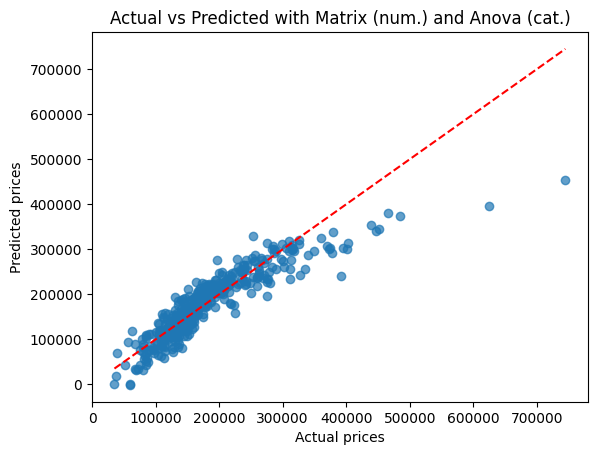

In [17]:
plt.scatter(y_test_Anova, y_pred_lr_Anova, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.) and Anova (cat.)")
plt.plot([y_test_Anova.min(), y_test_Anova.max()], [y_test_Anova.min(), y_test_Anova.max()], 'r--') 
plt.show()

In [18]:
# Bei der Test Daten fehlt eine Spalte. Ich identifieziere sie und fülle ein.

X_real_test_d = pd.read_csv("data/test_cleaned_analyse.csv")

missing_cols = set(X_train_d.columns) - set(X_real_test_d.columns)

# Füge sie mit Nullen ein
for col in missing_cols:
    X_real_test_d[col] = 0

# Gleiche Spaltenreihenfolge erzwingen
X_real_test_d = X_real_test_d[X_train_d.columns]

# Dann skalieren und vorhersagen mit dem besten Model (2B)
X_real_test_scaled_d = preprocessor_d.transform(X_real_test_d)
y_real_pred_d = model_lr_d.predict(X_real_test_scaled_d)

# Ausgabe anzeigen
print("Vorhersagen auf echten Testdaten:")
print(y_real_pred_d)

Vorhersagen auf echten Testdaten:
[100540.11596522 150437.57382981 163061.99670337 ... 147060.07029387
 123403.51452864 217309.2569145 ]


In [19]:
#Ich brauche die ID noch, um die Ergebnisse zu zeigen

df_original_test = pd.read_csv("data/test.csv")

ids = df_original_test["Id"].values

In [20]:
y_predicted_df = pd.DataFrame({"Id": ids, "SalePrice": y_real_pred_d})

y_predicted_df.to_csv("data/test_daten_predicted.csv", index=False)


In [26]:
#Vorhersagen mit LightGBMRegressor

df_whole_train_df_LGMB = pd.read_csv('data/train_cleaned_dummy_analyse.csv')

X_LGBMR = df_whole_train_df_LGMB.drop(['SalePrice'], axis=1)

y_LGBMR = np.log1p(df_whole_train_df_LGMB['SalePrice']) #1. Teil Log-Transformation

#Die Verteilung kann das Training von Modellen erschweren, weil große Werte (teure Häuser) dominieren die Fehler, 
# kleine Werte (günstige Häuser) werden kaum beachtet. 
#Die Logarithmus-Funktion streckt kleine Werte und komprimiert große Werte.
#Dadurch wird die Verteilung mehr symmetrisch (normaler).
#Das Modell lernt besser, da es sich auf proportionale (relative) Fehler konzentriert, nicht auf absolute.

X_train_LGBMR, X_test_LGBMR, y_train_LGBMR, y_test_LGBMR = train_test_split(X_LGBMR, y_LGBMR, test_size=0.3, random_state=42)

In [27]:
#Bauen des Models

model_LGBMR = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

In [28]:
#Model wird trainiert

model_LGBMR.fit(
    X_train_LGBMR, y_train_LGBMR,
    eval_set=[(X_test_LGBMR, y_test_LGBMR)],
    eval_metric='rmse',
    callbacks=[early_stopping(100), log_evaluation(0)]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 985
[LightGBM] [Info] Number of data points in the train set: 1021, number of used features: 36
[LightGBM] [Info] Start training from score 12.027399
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.15028	valid_0's l2: 0.0225842


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,1000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [29]:
#Vorhersage im Bereich der Training Date und Evaluation des Models.
y_pred_LGBMR_log = model_LGBMR.predict(X_test_LGBMR)

# Aus der Log-transform zurück.
y_pred_real = np.expm1(y_pred_LGBMR_log) # 2. Teil der Log-Trasformation
y_valid_real = np.expm1(y_test_LGBMR)

# Evaluierung
rmsle = np.sqrt(mean_squared_log_error(y_valid_real, y_pred_real))
r2 = r2_score(y_valid_real, y_pred_real)

print(f"RMSLE: {rmsle:.5f}")
print(f"R²: {r2:.5f}")

RMSLE: 0.15028
R²: 0.88314


In [30]:
y_real_pred_LGBMR = model_LGBMR.predict(X_real_test_d)

# Ausgabe anzeigen
print("Vorhersagen auf echten Testdaten:")
print(y_real_pred_LGBMR)

Vorhersagen auf echten Testdaten:
[11.74770255 11.87965226 12.0182351  ... 11.93423603 11.66496458
 12.3042511 ]


In [31]:
y_predicted_LGBMR = pd.DataFrame({"Id": ids, "SalePrice": y_real_pred_LGBMR})

y_predicted_LGBMR.to_csv("data/test_daten_predicted_LGBMR.csv", index=False)